In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path


In [2]:
result_dict = {'montreal': {'balanced':{}, 'unbalanced':{}}, 'toronto':{'balanced':{}, 'unbalanced':{}}}
for device in result_dict.keys():
    for dist in result_dict[device].keys():
        loc = Path.cwd()/f'naive({device})'/dist
        temp = dict()
        temp['real'] = np.load(loc/'regression.npy')
        temp['sim'] = np.load(loc/'sim_regression.npy')
        temp['uniform'] = np.load(loc/'uniform_regression.npy')
        temp['ideal'] = np.load(loc/'ideal_regression.npy')
        result_dict[device][dist] = temp
x = np.array([0, 1, 2, 3])
y = {'balanced':np.array([-1, -1, 1, 1]), 'unbalanced':np.array([-1, 1, 1, 1])}

In [3]:
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.fontsize']= 'medium'
plt.rcParams['lines.markersize'] = 8

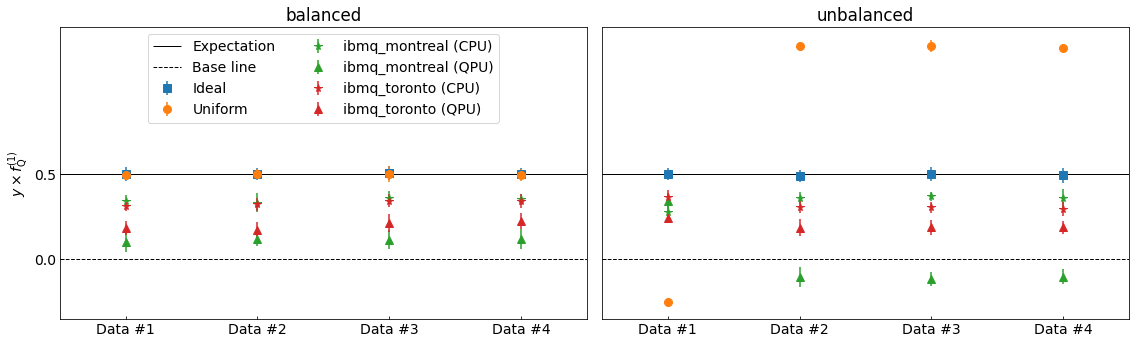

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, squeeze=True, figsize=(16, 5))
fig.tight_layout()
devices = ['montreal', 'toronto']
dists = ['balanced', 'unbalanced']
colors = dict(zip(devices, ['#2ca02c', '#d62728']))
for i, dist in enumerate(dists):
    ax = axes[i]
    ax.set_xticks(x)
    ax.set_xticklabels([f'Data #{d+1}' for d in range(4)])
    ax.set_xlim([-0.5, 3.5])
    ax.set_ylabel(r'$y \times f^{(1)}_{\mathrm{Q}}$') if i==0 else None
    ax.set_title(dist)
    ax.set_yticks([0, 0.5])

    ideal_f = np.concatenate(list(map(lambda z: result_dict[z][dist]['ideal'], devices)))
    uniform_f = np.concatenate(list(map(lambda z: result_dict[z][dist]['uniform'], devices)))
    noise_f = dict(zip(devices, map(lambda z: result_dict[z][dist]['sim'], devices)))
    real_f = dict(zip(devices, map(lambda z: result_dict[z][dist]['real'], devices)))

    ax.hlines(0.5, -0.5, 3.5, linewidth=1, color='k', label='Expectation')
    ax.hlines(0, -0.5, 3.5, linewidth=1,linestyles='--', color='k', label='Base line')
    ax.errorbar(x, y[dist]*ideal_f.mean(axis=0), yerr=2*ideal_f.std(axis=0), linestyle='none', marker='s', label='Ideal')
    ax.errorbar(x, y[dist]*uniform_f.mean(axis=0), yerr=2*uniform_f.std(axis=0), linestyle='none', marker='o', label='Uniform')
    for device in devices:
        ax.errorbar(x, y[dist]*noise_f[device].mean(axis=0), yerr=2*noise_f[device].std(axis=0), linestyle='none', marker='*', color=colors[device], label=f'ibmq_{device} (CPU)')
        ax.errorbar(x, y[dist]*real_f[device].mean(axis=0), yerr=2*real_f[device].std(axis=0), linestyle='none', marker='^', color=colors[device], label=f'ibmq_{device} (QPU)')

axes[0].legend(loc = 'upper center', ncol=2)
plt.tight_layout()
plt.savefig('/home/quic/Desktop/result.png', dpi=200)

In [7]:
import dill
with open('./naive(toronto)/balanced/qasvm', 'rb') as f:
    layout = dill.load(f).quantum_instance.compile_config['initial_layout']

fig = layout.plot('physical')
fig.set_figwidth(10)
fig.set_figheight(6)
fig.tight_layout()
fig.savefig('/home/quic/Desktop/toronto.eps', dpi=200)
print(layout)

Layout({
13: Qubit(QuantumRegister(1, 'a'), 0),
10: Qubit(QuantumRegister(2, 'i'), 0),
7: Qubit(QuantumRegister(2, 'i'), 1),
12: Qubit(QuantumRegister(1, 'xi'), 0),
6: Qubit(QuantumRegister(1, 'yi'), 0),
11: Qubit(QuantumRegister(2, 'j'), 0),
8: Qubit(QuantumRegister(2, 'j'), 1),
14: Qubit(QuantumRegister(1, 'xj'), 0),
9: Qubit(QuantumRegister(1, 'yj'), 0)
})


In [8]:
import dill
with open('./naive(montreal)/balanced/qasvm', 'rb') as f:
    layout = dill.load(f).quantum_instance.compile_config['initial_layout']

fig = layout.plot('physical')
fig.set_figwidth(10)
fig.set_figheight(6)
fig.tight_layout()
fig.savefig('/home/quic/Desktop/montreal.eps', dpi=200)
print(layout)

Layout({
3: Qubit(QuantumRegister(1, 'a'), 0),
8: Qubit(QuantumRegister(2, 'i'), 0),
11: Qubit(QuantumRegister(2, 'i'), 1),
5: Qubit(QuantumRegister(1, 'xi'), 0),
14: Qubit(QuantumRegister(1, 'yi'), 0),
1: Qubit(QuantumRegister(2, 'j'), 0),
4: Qubit(QuantumRegister(2, 'j'), 1),
2: Qubit(QuantumRegister(1, 'xj'), 0),
7: Qubit(QuantumRegister(1, 'yj'), 0)
})
